In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
%matplotlib inline
plt.style.use('paper')

In [3]:
df = pd.read_csv('cks_physical_merged.csv', index_col=0)
df.head(30)

,id_starname,id_kic,id_koicand,id_kepler_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0,koi_time0_err1,...,iso_prad_err2,iso_sma,iso_sma_err1,iso_sma_err2,iso_insol,iso_insol_err1,iso_insol_err2,iso_teq,iso_teq_err1,iso_teq_err2
0,K00001,11446443,K00001.01,Kepler-1 b,CONFIRMED,2.470613,1.900000e-08,-1.900000e-08,2454955.763,0.000006,...,-1.419266,0.035951,0.000596,-0.000596,890.712853,184.876216,-184.876216,1392.188224,71.758330,-71.758330
1,K00002,10666592,K00002.01,Kepler-2 b,CONFIRMED,2.204735,3.800000e-08,-3.800000e-08,2454954.359,0.000014,...,-2.018515,0.036880,0.000727,-0.000727,3029.593093,931.186264,-931.186264,1890.643307,146.140168,-146.140168
2,K00003,10748390,K00003.01,Kepler-3 b,CONFIRMED,4.887803,1.770000e-07,-1.770000e-07,2454957.813,0.000028,...,-0.410257,0.052952,0.000883,-0.000883,116.907786,20.094411,-20.094411,837.962116,35.981752,-35.981752
3,K00006,3248033,K00006.01,NaN,FALSE POSITIVE,1.334104,7.070000e-07,-7.070000e-07,2454966.702,0.000420,...,-21.966014,0.025383,0.000427,-0.000427,3595.445148,694.155894,-694.155894,1973.338972,95.179897,-95.179897
4,K00007,11853905,K00007.01,Kepler-4 b,CONFIRMED,3.213669,1.122000e-06,-1.122000e-06,2454956.612,0.000280,...,-0.596032,0.044247,0.001075,-0.001075,1233.844672,367.335736,-367.335736,1510.353647,112.889880,-112.889880
5,K00008,5903312,K00008.01,NaN,FALSE POSITIVE,1.160153,4.270000e-07,-4.270000e-07,2454954.704,0.000369,...,-0.191473,0.021741,0.000361,-0.000361,2211.175946,378.322751,-378.322751,1747.508720,74.047754,-74.047754
6,K00010,6922244,K00010.01,Kepler-8 b,CONFIRMED,3.522499,1.940000e-07,-1.940000e-07,2454954.119,0.000046,...,-1.848297,0.047201,0.000822,-0.000822,1008.984582,285.797628,-285.797628,1436.265269,101.510972,-101.510972
7,K00017,10874614,K00017.01,Kepler-6 b,CONFIRMED,3.234699,1.130000e-07,-1.130000e-07,2454954.487,0.000028,...,-2.103316,0.044398,0.001058,-0.001058,978.501477,284.166523,-284.166523,1425.292164,103.051539,-103.051539
8,K00018,8191672,K00018.01,Kepler-5 b,CONFIRMED,3.548465,1.960000e-07,-1.960000e-07,2454955.901,0.000046,...,-2.194129,0.049668,0.001063,-0.001063,1483.296079,478.292268,-478.292268,1581.504702,127.993235,-127.993235
9,K00020,11804465,K00020.01,Kepler-12 b,CONFIRMED,4.437963,1.670000e-07,-1.670000e-07,2455004.009,0.000028,...,-3.130341,0.055255,0.001190,-0.001190,1004.271661,302.385394,-302.385394,1434.585139,107.335685,-107.335685


In [4]:
multis = pd.DataFrame(columns = df.columns)
multis.head()

,id_starname,id_kic,id_koicand,id_kepler_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0,koi_time0_err1,...,iso_prad_err2,iso_sma,iso_sma_err1,iso_sma_err2,iso_insol,iso_insol_err1,iso_insol_err2,iso_teq,iso_teq_err1,iso_teq_err2


In [5]:
for i, row in df.head().iterrows():
    multis = multis.append(row)

In [6]:
multis

,id_starname,id_kic,id_koicand,id_kepler_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0,koi_time0_err1,...,iso_prad_err2,iso_sma,iso_sma_err1,iso_sma_err2,iso_insol,iso_insol_err1,iso_insol_err2,iso_teq,iso_teq_err1,iso_teq_err2
0,K00001,11446443,K00001.01,Kepler-1 b,CONFIRMED,2.470613,1.900000e-08,-1.900000e-08,2454955.763,0.000006,...,-1.419266,0.035951,0.000596,-0.000596,890.712853,184.876216,-184.876216,1392.188224,71.758330,-71.758330
1,K00002,10666592,K00002.01,Kepler-2 b,CONFIRMED,2.204735,3.800000e-08,-3.800000e-08,2454954.359,0.000014,...,-2.018515,0.036880,0.000727,-0.000727,3029.593093,931.186264,-931.186264,1890.643307,146.140168,-146.140168
2,K00003,10748390,K00003.01,Kepler-3 b,CONFIRMED,4.887803,1.770000e-07,-1.770000e-07,2454957.813,0.000028,...,-0.410257,0.052952,0.000883,-0.000883,116.907786,20.094411,-20.094411,837.962116,35.981752,-35.981752
3,K00006,3248033,K00006.01,NaN,FALSE POSITIVE,1.334104,7.070000e-07,-7.070000e-07,2454966.702,0.000420,...,-21.966014,0.025383,0.000427,-0.000427,3595.445148,694.155894,-694.155894,1973.338972,95.179897,-95.179897
4,K00007,11853905,K00007.01,Kepler-4 b,CONFIRMED,3.213669,1.122000e-06,-1.122000e-06,2454956.612,0.000280,...,-0.596032,0.044247,0.001075,-0.001075,1233.844672,367.335736,-367.335736,1510.353647,112.889880,-112.889880


In [7]:
multis = pd.DataFrame(columns = df.columns)
for ID in df['id_starname'].unique():
    if (df['id_starname'] == ID).sum() > 1:
        for i, row in df[df['id_starname'] == ID].sort_values('koi_period').iterrows():
            multis=multis.append(row)

In [8]:
multis

,id_starname,id_kic,id_koicand,id_kepler_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0,koi_time0_err1,...,iso_prad_err2,iso_sma,iso_sma_err1,iso_sma_err2,iso_insol,iso_insol_err1,iso_insol_err2,iso_teq,iso_teq_err1,iso_teq_err2
12,K00041,6521045,K00041.02,Kepler-100 b,CONFIRMED,6.887060,2.038000e-05,-2.038000e-05,2454966.178,0.002390,...,-0.235962,0.073338,0.001600,-0.001600,470.454733,139.442304,-139.442304,1186.842219,88.237666,-88.237666
11,K00041,6521045,K00041.01,Kepler-100 c,CONFIRMED,12.815884,1.836000e-05,-1.836000e-05,2454955.948,0.001100,...,-0.344682,0.110944,0.002407,-0.002407,205.741751,61.011727,-61.011727,965.148487,71.352338,-71.352338
13,K00041,6521045,K00041.03,Kepler-100 d,CONFIRMED,35.333087,2.155000e-04,-2.155000e-04,2454986.983,0.004810,...,-0.318251,0.218115,0.004702,-0.004702,53.079626,15.708409,-15.708409,687.852770,50.859311,-50.859311
15,K00046,10905239,K00046.01,Kepler-101 b,CONFIRMED,3.487689,1.133000e-06,-1.133000e-06,2455003.932,0.000262,...,-0.738680,0.047280,0.001321,-0.001321,1030.563356,279.370300,-279.370300,1443.883654,97.817569,-97.817569
16,K00046,10905239,K00046.02,Kepler-101 c,CONFIRMED,6.029795,7.054000e-05,-7.054000e-05,2454965.482,0.008860,...,-0.165451,0.068094,0.001884,-0.001884,497.053587,132.230587,-132.230587,1203.273436,79.680910,-79.680910
22,K00070,6850504,K00070.02,Kepler-20 b,CONFIRMED,3.696120,2.310000e-06,-2.310000e-06,2454967.502,0.000523,...,-0.256781,0.045758,0.000772,-0.000772,355.352832,60.250547,-60.250547,1106.441537,46.692798,-46.692798
25,K00070,6850504,K00070.04,Kepler-20 e,CONFIRMED,6.098537,2.838000e-05,-2.838000e-05,2454968.930,0.003910,...,-0.130190,0.063870,0.001060,-0.001060,182.103797,31.010203,-31.010203,936.145332,39.695019,-39.695019
21,K00070,6850504,K00070.01,Kepler-20 c,CONFIRMED,10.854098,4.400000e-06,-4.400000e-06,2454971.608,0.000332,...,-0.277416,0.093814,0.001564,-0.001564,84.441905,14.365129,-14.365129,772.508082,32.858922,-32.858922
24,K00070,6850504,K00070.05,Kepler-20 f,CONFIRMED,19.577629,1.240000e-04,-1.240000e-04,2454968.206,0.005240,...,-0.087021,0.139043,0.002328,-0.002328,38.486330,6.440680,-6.440680,634.731645,26.433802,-26.433802
23,K00070,6850504,K00070.03,Kepler-20 d,CONFIRMED,77.611599,1.357000e-04,-1.357000e-04,2454997.727,0.001500,...,-0.219742,0.348344,0.005780,-0.005780,6.134883,1.052890,-1.052890,401.065313,17.139961,-17.139961


matches # in weiss 18 paper before her extra cuts

In [9]:
multis.shape

(1215, 120)

In [10]:
IDs = multis['id_starname'].unique()
ID = IDs[0]
ID

'K00041'

In [11]:
s = multis[multis['id_starname'] == ID]
s

,id_starname,id_kic,id_koicand,id_kepler_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0,koi_time0_err1,...,iso_prad_err2,iso_sma,iso_sma_err1,iso_sma_err2,iso_insol,iso_insol_err1,iso_insol_err2,iso_teq,iso_teq_err1,iso_teq_err2
12,K00041,6521045,K00041.02,Kepler-100 b,CONFIRMED,6.887060,0.000020,-0.000020,2454966.178,0.00239,...,-0.235962,0.073338,0.001600,-0.001600,470.454733,139.442304,-139.442304,1186.842219,88.237666,-88.237666
11,K00041,6521045,K00041.01,Kepler-100 c,CONFIRMED,12.815884,0.000018,-0.000018,2454955.948,0.00110,...,-0.344682,0.110944,0.002407,-0.002407,205.741751,61.011727,-61.011727,965.148487,71.352338,-71.352338
13,K00041,6521045,K00041.03,Kepler-100 d,CONFIRMED,35.333087,0.000215,-0.000215,2454986.983,0.00481,...,-0.318251,0.218115,0.004702,-0.004702,53.079626,15.708409,-15.708409,687.852770,50.859311,-50.859311


In [12]:
for i in range(s.shape[0]-1):
    print(s.iloc[i]['koi_prad'], s.iloc[i+1]['koi_prad'])

1.31 2.28
2.28 1.5


In [89]:
adj = pd.DataFrame(columns = ["R", "Rnext"])
for ID in multis['id_starname'].unique():
    s = multis[multis['id_starname'] == ID]
    for i in range(s.shape[0]-1):
        if ~np.isnan(s.iloc[i]['koi_prad']) and ~np.isnan(s.iloc[i+1]['koi_prad']): # both have measured radii
            if s.iloc[i]['koi_model_snr'] > 10 and s.iloc[i+1]['koi_model_snr'] > 10: # both high SNR
                if s.iloc[i]['koi_prad'] < 16 and s.iloc[i+1]['koi_prad'] < 16: # Smaller than 16  Earth radii
                    adj = adj.append(pd.Series({'R':s.iloc[i]['koi_prad'], 'Rnext':s.iloc[i+1]['koi_prad'], 'R_err1':s.iloc[i]['koi_prad_err1'], 'R_err2':s.iloc[i]['koi_prad_err2']}), ignore_index=True)

In [90]:
adj.shape[0]

663

In [91]:
adj.head()

,R,Rnext,R_err1,R_err2
0,1.31,2.28,0.03,-0.03
1,2.28,1.50,0.06,-0.05
2,4.36,0.91,1.01,-0.55
3,2.11,0.82,0.37,-0.17
4,0.82,3.03,0.15,-0.06


Text(0.3,6,'Pearson R = 0.54')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


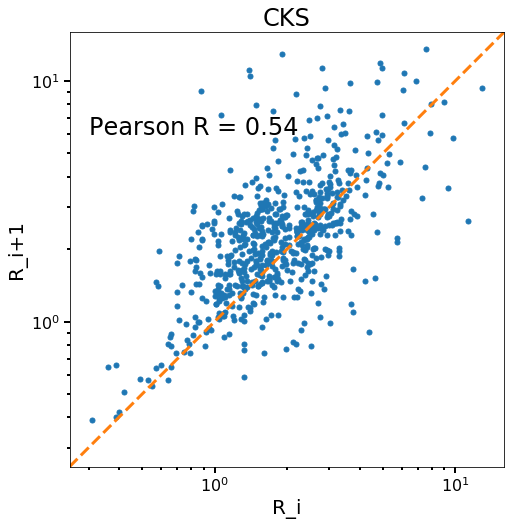

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(adj['R'], adj['Rnext'], '.')
ax.set_xlim([0.25,16])
ax.set_ylim([0.25,16])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')
ax.set_xlabel('R_i')
ax.set_ylabel('R_i+1')
ax.set_title('CKS')
ax.plot(np.linspace(0.25,16,10), np.linspace(0.25,16,10), '--')
ax.text(0.3, 6, 'Pearson R = {0:.2f}'.format(pearsonr(adj['R'], adj['Rnext'])[0]), fontsize=24)

In [65]:
import sys
sys.path.append('../forecaster')
import mr_forecast as mr

In [68]:
M = mr.Rpost2M(adj['R'], unit='Earth', classify='Yes')
Mnext = M

Terran 24.3 %, Neptunian 74.8 %, Jovian 0.9 %, Star 0.0 %


In [97]:
R = mr.Mpost2R(M, unit='Earth', classify='Yes')
Rnext = mr.Mpost2R(Mnext, unit='Earth', classify='Yes')
Robs, Rnextobs =  np.zeros(len(R)), np.zeros(len(R))

Terran 26.2 %, Neptunian 72.9 %, Jovian 0.8 %, Star 0.2 %
Terran 24.3 %, Neptunian 74.8 %, Jovian 0.9 %, Star 0.0 %


Text(0.3,6,'Pearson R = 0.67')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


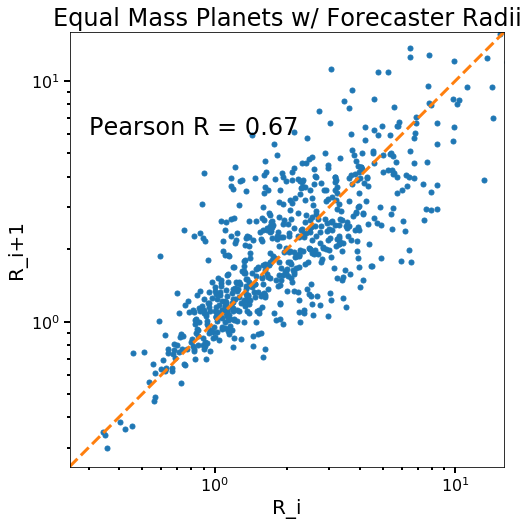

In [103]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(R, Rnext, '.')
ax.set_xlim([0.25,16])
ax.set_ylim([0.25,16])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')
ax.set_xlabel('R_i')
ax.set_ylabel('R_i+1')
ax.set_title('Equal Mass Planets w/ Forecaster Radii')
ax.plot(np.linspace(0.25,16,10), np.linspace(0.25,16,10), '--')
ax.text(0.3, 6, 'Pearson R = {0:.2f}'.format(pearsonr(R, Rnext)[0]), fontsize=24)

Text(0.3,6,'Pearson R = 0.54')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


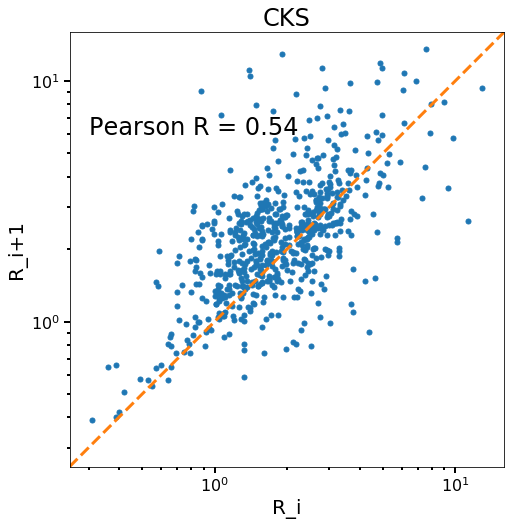

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(adj['R'], adj['Rnext'], '.')
ax.set_xlim([0.25,16])
ax.set_ylim([0.25,16])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')
ax.set_xlabel('R_i')
ax.set_ylabel('R_i+1')
ax.set_title('CKS')
ax.plot(np.linspace(0.25,16,10), np.linspace(0.25,16,10), '--')
ax.text(0.3, 6, 'Pearson R = {0:.2f}'.format(pearsonr(adj['R'], adj['Rnext'])[0]), fontsize=24)

In [100]:
for i, r in enumerate(R):
    err = random.randint(2)
    # choose whether we measure above or below at random
    if err == 0:
        e = adj.iloc[i]['R_err1']
    else:
        e = adj.iloc[i]['R_err2']
    # err2 for below is < 0, so take a sample using abs(err), take the abs and use sign(err) for whether to add or sub
    Robs[i] = R[i] + np.sign(e)*np.abs(random.normal(0, np.abs(e), 1)[0])
    
    err = random.randint(2)
    # choose whether we measure above or below at random
    if err == 0:
        e = adj.iloc[i]['R_err1']
    else:
        e = adj.iloc[i]['R_err2']
    # err2 for below is < 0, so take a sample using abs(err), take the abs and use sign(err) for whether to add or sub
    Rnextobs[i] = Rnext[i] + np.sign(e)*np.abs(random.normal(0, np.abs(e), 1)[0])

Text(0.3,6,'Pearson R = 0.67')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


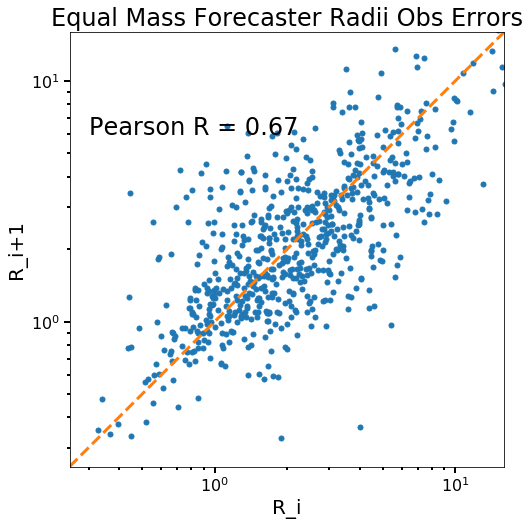

In [104]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(Robs, Rnextobs, '.')
ax.set_xlim([0.25,16])
ax.set_ylim([0.25,16])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')
ax.set_xlabel('R_i')
ax.set_ylabel('R_i+1')
ax.set_title('Equal Mass Forecaster Radii Obs Errors')
ax.plot(np.linspace(0.25,16,10), np.linspace(0.25,16,10), '--')
ax.text(0.3, 6, 'Pearson R = {0:.2f}'.format(pearsonr(R, Rnext)[0]), fontsize=24)

Text(0.3,6,'Pearson R = 0.54')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


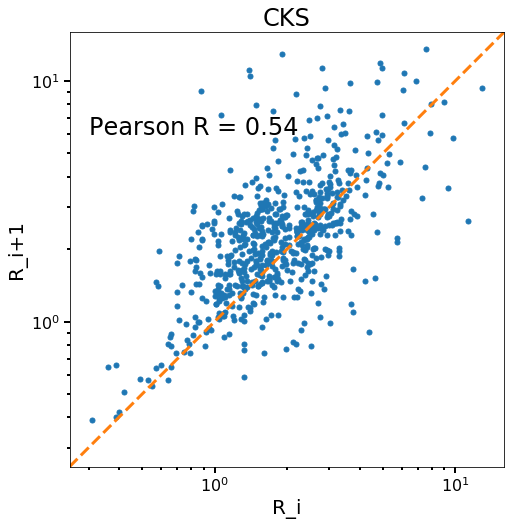

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(adj['R'], adj['Rnext'], '.')
ax.set_xlim([0.25,16])
ax.set_ylim([0.25,16])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')
ax.set_xlabel('R_i')
ax.set_ylabel('R_i+1')
ax.set_title('CKS')
ax.plot(np.linspace(0.25,16,10), np.linspace(0.25,16,10), '--')
ax.text(0.3, 6, 'Pearson R = {0:.2f}'.format(pearsonr(adj['R'], adj['Rnext'])[0]), fontsize=24)